In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

/Users/gabrielgaslain/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('velib-disponibilite-en-temps-reel-3.csv',sep=";")


In [3]:
df.shape

(1471, 15)

In [4]:
df.dtypes

Identifiant station                object
Nom station                        object
Station en fonctionnement          object
Capacité de la station              int64
Nombre bornettes libres             int64
Nombre total vélos disponibles      int64
Vélos mécaniques disponibles        int64
Vélos électriques disponibles       int64
Borne de paiement disponible       object
Retour vélib possible              object
Actualisation de la donnée         object
Coordonnées géographiques          object
Nom communes équipées              object
Code INSEE communes équipées        int64
station_opening_hours             float64
dtype: object

In [5]:
df = df.drop(columns=['station_opening_hours'])


In [6]:
df["Capacité de la station"] = df["Nombre bornettes libres"]+df["Nombre total vélos disponibles"]
df

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées
0,40001,Hôpital Mondor,OUI,0.750000,12,16,10,6,OUI,OUI,2025-03-12T12:57:10+00:00,"48.798922410229, 2.4537451531298",Créteil,94028
1,16107,Benjamin Godard - Victor Hugo,OUI,10.000000,30,3,1,2,OUI,OUI,2025-03-12T12:54:33+00:00,"48.865983, 2.275725",Paris,75056
2,32017,Basilique,OUI,0.750000,9,12,3,9,OUI,OUI,2025-03-12T12:55:08+00:00,"48.93626891059109, 2.3588666820200914",Saint-Denis,93066
3,44015,Rouget de L'isle - Watteau,OUI,0.666667,8,12,1,11,OUI,OUI,2025-03-12T12:58:09+00:00,"48.778192750803, 2.3963020229163",Vitry-sur-Seine,94081
4,11104,Charonne - Robert et Sonia Delaunay,OUI,inf,20,0,0,0,OUI,OUI,2025-03-12T12:52:48+00:00,"48.855907555969, 2.3925706744194",Paris,75056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,21302,Aristide Briand - Place de la Résistance,OUI,0.000000,0,45,38,7,OUI,OUI,2025-03-12T12:57:45+00:00,"48.82124248401006, 2.2511002421379094",Issy-les-Moulineaux,92040
1467,8002,Gare Saint-Lazare - Cour du Havre,OUI,2.500000,30,12,6,6,OUI,OUI,2025-03-12T12:57:36+00:00,"48.875674400851, 2.3265598341823",Paris,75056
1468,8004,Malesherbes - Place de la Madeleine,OUI,0.082192,6,73,32,41,OUI,OUI,2025-03-12T12:58:48+00:00,"48.870406028483, 2.323243509808",Paris,75056
1469,4010,Saint-Antoine Sévigné,OUI,0.166667,4,24,21,3,OUI,OUI,2025-03-12T12:58:52+00:00,"48.8550222, 2.3612322",Paris,75056


In [7]:
df = df[df["Station en fonctionnement"] != "NON"]
df = df[df["Capacité de la station"] != 0]

In [8]:
df.count()

Identifiant station               1421
Nom station                       1421
Station en fonctionnement         1421
Capacité de la station            1410
Nombre bornettes libres           1421
Nombre total vélos disponibles    1421
Vélos mécaniques disponibles      1421
Vélos électriques disponibles     1421
Borne de paiement disponible      1421
Retour vélib possible             1421
Actualisation de la donnée        1421
Coordonnées géographiques         1421
Nom communes équipées             1421
Code INSEE communes équipées      1421
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1470
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Identifiant station             1446 non-null   object
 1   Nom station                     1446 non-null   object
 2   Station en fonctionnement       1446 non-null   object
 3   Capacité de la station          1446 non-null   int64 
 4   Nombre bornettes libres         1446 non-null   int64 
 5   Nombre total vélos disponibles  1446 non-null   int64 
 6   Vélos mécaniques disponibles    1446 non-null   int64 
 7   Vélos électriques disponibles   1446 non-null   int64 
 8   Borne de paiement disponible    1446 non-null   object
 9   Retour vélib possible           1446 non-null   object
 10  Actualisation de la donnée      1446 non-null   object
 11  Coordonnées géographiques       1446 non-null   object
 12  Nom communes équipées           1446 non-null   objec

In [ ]:
df.describe()

,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Code INSEE communes équipées
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,30.845090,18.946750,11.898340,7.631397,4.266943,80980.621715
std,11.597795,12.261423,11.722868,9.940534,4.295726,8410.203677
min,8.000000,0.000000,0.000000,0.000000,0.000000,75056.000000
25%,22.000000,9.000000,3.000000,1.000000,1.000000,75056.000000
50%,28.000000,18.000000,8.000000,3.000000,3.000000,75056.000000
75%,36.000000,26.000000,18.000000,12.000000,6.000000,92040.000000
max,74.000000,65.000000,68.000000,65.000000,35.000000,95018.000000


In [9]:
df.dropna(inplace=True)

In [10]:
print(df.isna().sum())  # Or df.isnull().sum() : it count the number of missing values per column

Identifiant station               0
Nom station                       0
Station en fonctionnement         0
Capacité de la station            0
Nombre bornettes libres           0
Nombre total vélos disponibles    0
Vélos mécaniques disponibles      0
Vélos électriques disponibles     0
Borne de paiement disponible      0
Retour vélib possible             0
Actualisation de la donnée        0
Coordonnées géographiques         0
Nom communes équipées             0
Code INSEE communes équipées      0
dtype: int64


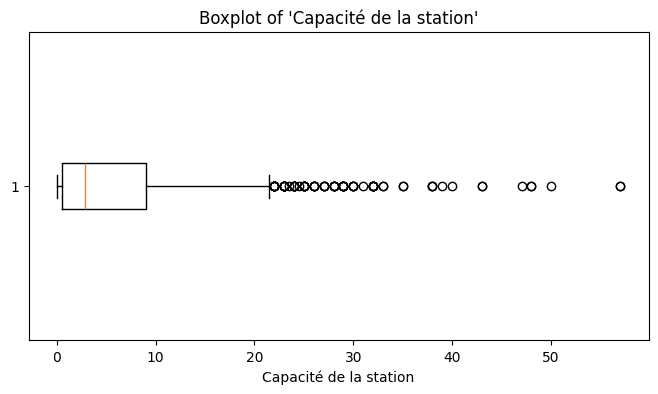

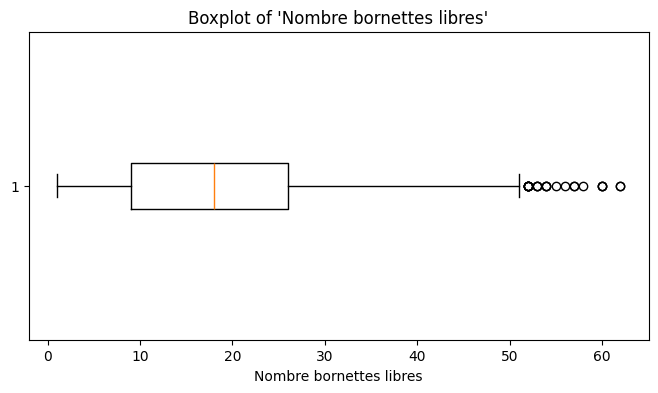

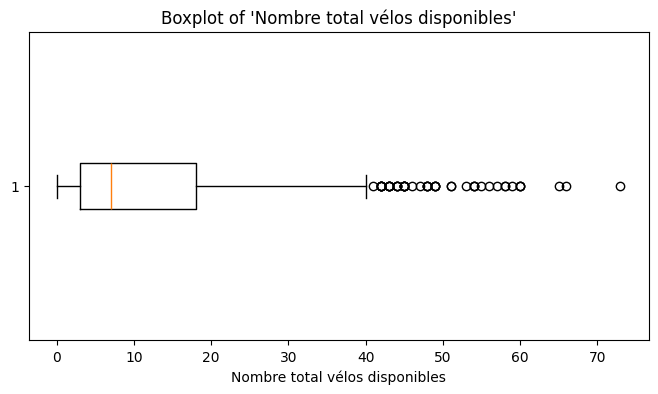

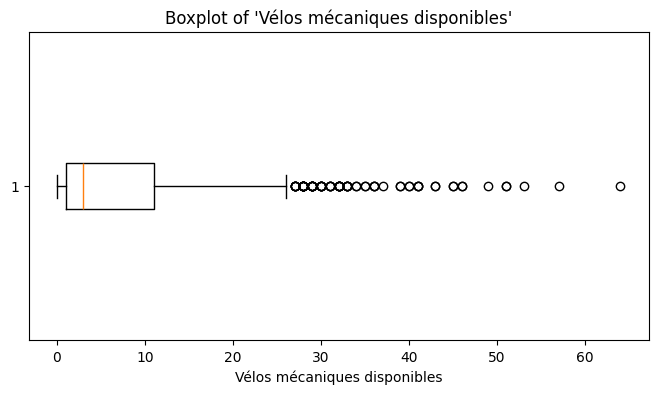

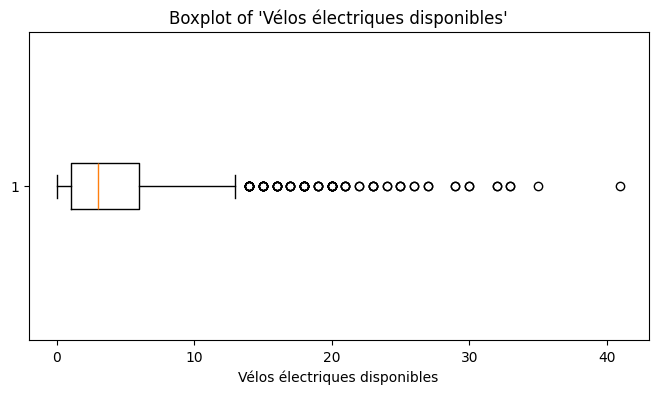

ValueError: supplied range of [0.016666666666666666, inf] is not finite

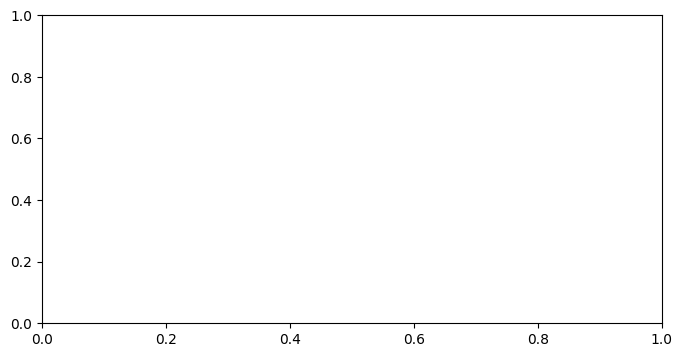

In [11]:
numerical_columns = ["Capacité de la station", "Nombre bornettes libres", 
                     "Nombre total vélos disponibles", "Vélos mécaniques disponibles", 
                     "Vélos électriques disponibles"]

# Générer les boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of '{col}'")
    plt.xlabel(col)
    plt.show()

# Générer les histogrammes
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=20, edgecolor="black", alpha=0.7)
    plt.title(f"Histogram of '{col}'")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

I Think that we finished the cleaning of our dataset. There are no NaN or incoherent values, the columns names are understandable and evely columns have the same amount of datas with no missing values

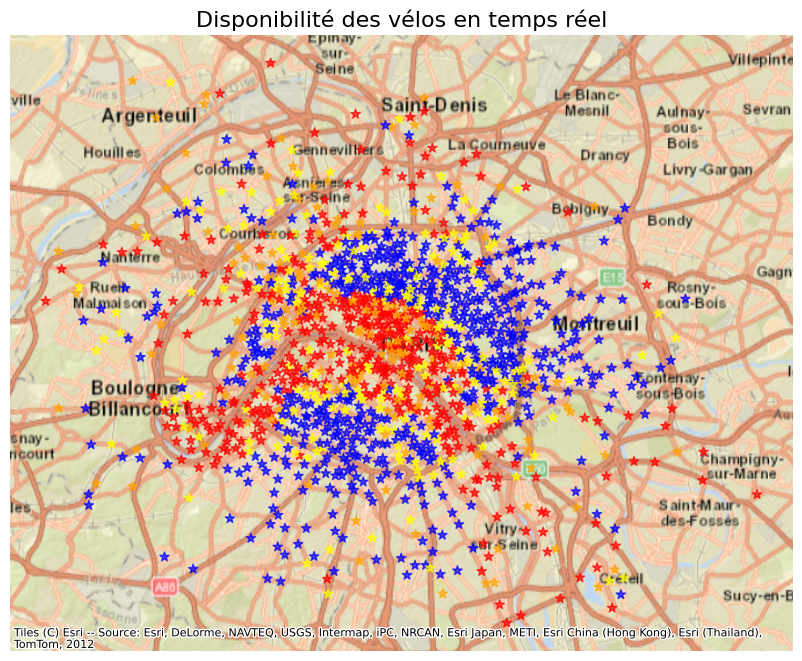

In [12]:
df[['latitude', 'longitude']] = df['Coordonnées géographiques'].str.split(', ', expand=True)
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

# Définition des couleurs selon le nombre de vélos disponibles
df['color'] = df['Nombre total vélos disponibles'].apply(lambda x: 'red' if x > 15 else 'orange' if x > 10 else 'yellow' if x > 5 else 'blue')

# Création du GeoDataFrame
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Création de la figure
fig, ax = plt.subplots(figsize=(12, 8))

# Affichage des stations Vélib' avec couleur selon vélos disponibles
gdf.plot(ax=ax, marker='*', color=gdf['color'], markersize=50, alpha=0.7)

# Ajout du fond de carte
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.Esri.WorldStreetMap)

# Ajustements
ax.set_title("Disponibilité des vélos en temps réel", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_axis_off()

plt.show()

In [22]:
df["Densite de la Station"] = (df["Nombre total vélos disponibles"]) / df["Capacité de la station"]
df

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées,latitude,longitude,color,geometry,Densite de la Station
0,40001,Hôpital Mondor,OUI,0.750000,12,16,10,6,OUI,OUI,2025-03-12T12:57:10+00:00,"48.798922410229, 2.4537451531298",Créteil,94028,48.798922,2.453745,red,POINT (2.4537451531298 48.798922410229),21.333333
1,16107,Benjamin Godard - Victor Hugo,OUI,10.000000,30,3,1,2,OUI,OUI,2025-03-12T12:54:33+00:00,"48.865983, 2.275725",Paris,75056,48.865983,2.275725,blue,POINT (2.275725 48.865983),0.300000
2,32017,Basilique,OUI,0.750000,9,12,3,9,OUI,OUI,2025-03-12T12:55:08+00:00,"48.93626891059109, 2.3588666820200914",Saint-Denis,93066,48.936269,2.358867,orange,POINT (2.3588666820200914 48.93626891059109),16.000000
3,44015,Rouget de L'isle - Watteau,OUI,0.666667,8,12,1,11,OUI,OUI,2025-03-12T12:58:09+00:00,"48.778192750803, 2.3963020229163",Vitry-sur-Seine,94081,48.778193,2.396302,orange,POINT (2.3963020229163 48.778192750803),18.000000
4,11104,Charonne - Robert et Sonia Delaunay,OUI,inf,20,0,0,0,OUI,OUI,2025-03-12T12:52:48+00:00,"48.855907555969, 2.3925706744194",Paris,75056,48.855908,2.392571,blue,POINT (2.3925706744194 48.855907555969),0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,33019,Madeleine Vionnet,OUI,0.062500,3,48,15,33,OUI,OUI,2025-03-12T12:58:28+00:00,"48.902519074064, 2.3740895837545",Aubervilliers,93001,48.902519,2.374090,red,POINT (2.3740895837545 48.902519074064),768.000000
1467,8002,Gare Saint-Lazare - Cour du Havre,OUI,2.500000,30,12,6,6,OUI,OUI,2025-03-12T12:57:36+00:00,"48.875674400851, 2.3265598341823",Paris,75056,48.875674,2.326560,orange,POINT (2.3265598341823 48.875674400851),4.800000
1468,8004,Malesherbes - Place de la Madeleine,OUI,0.082192,6,73,32,41,OUI,OUI,2025-03-12T12:58:48+00:00,"48.870406028483, 2.323243509808",Paris,75056,48.870406,2.323244,red,POINT (2.323243509808 48.870406028483),888.166667
1469,4010,Saint-Antoine Sévigné,OUI,0.166667,4,24,21,3,OUI,OUI,2025-03-12T12:58:52+00:00,"48.8550222, 2.3612322",Paris,75056,48.855022,2.361232,red,POINT (2.3612322 48.8550222),144.000000
